In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from funpymodeling.exploratory import freq_tbl

In [58]:
dfv= pd.read_csv("México_IQR.csv")
dfv.head(5)

,Unnamed: 0,identificación,fuente,nombre,descripciÃ³n,descripciÃ³n general del vecindario,id_host,nombre_host,tiempo_respuesta_host,tasa_respuesta_host,...,noches_mÃ­nimo_avg_ntm,mÃ¡ximas_noches_avg_ntm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_comunicaciÃ³n,review_scores_location,review_scores_value,reseñas_por_mes
0,0,35797.0,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Mall, Interloma Park and the Lion Des...",153786,Dici,a few days or more,0%,...,1.0,7.0,4.80,4.85,4.80,4.89,4.88,4.88,4.77,0.00
1,1,44616.0,previous scrape,Condesa Haus,A new concept of hosting in mexico through a b...,Not available,196253,Fernando,within an hour,100%,...,1.0,365.0,4.58,4.56,4.70,4.87,4.78,4.98,4.48,0.41
2,2,67703.0,city scrape,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",Not available,334451,Nicholas,within an hour,71%,...,2.0,30.0,4.90,4.81,4.75,4.94,4.92,4.98,4.91,0.31
3,3,70644.0,city scrape,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Coyoacan is a beautiful neighborhood famous fo...,212109,Trisha,within a few hours,100%,...,3.7,180.0,4.91,4.90,4.96,4.96,4.98,4.96,4.92,0.83
4,4,107078.0,city scrape,NEW DESIGNER LOFT,Is the best ever place triple L <br />Location...,"Is located in the best area of Mexico City, Po...",540705,Andrea,within an hour,100%,...,1.0,1125.0,4.91,5.00,5.00,5.00,4.73,4.91,4.82,0.11


In [59]:
dfv['tasa_de_aceptación_host'] = dfv['tasa_de_aceptación_host'].str.replace('%', '', regex=True).astype(float) / 100

__PRECIO VS TASA DE ACEPTACIÓN HOST__

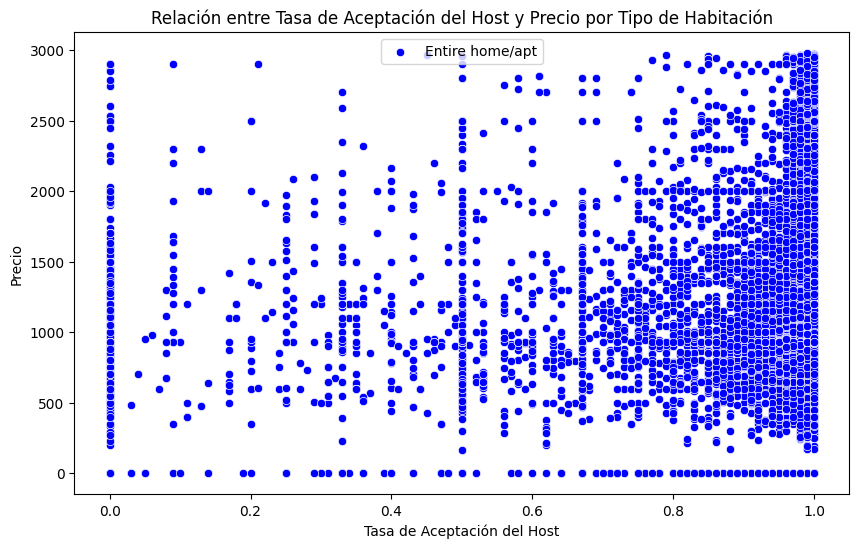

In [60]:
df_entire_room = dfv[dfv['tipo_habitación'] == 'Entire home/apt'].dropna(subset=['tasa_de_aceptación_host', 'precio'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tasa_de_aceptación_host', y='precio', data=df_entire_room, color='blue', label='Entire home/apt')
plt.title("Relación entre Tasa de Aceptación del Host y Precio por Tipo de Habitación")
plt.xlabel("Tasa de Aceptación del Host")
plt.ylabel("Precio")
plt.legend()
plt.show()

TypeError: 'Axes' object is not subscriptable

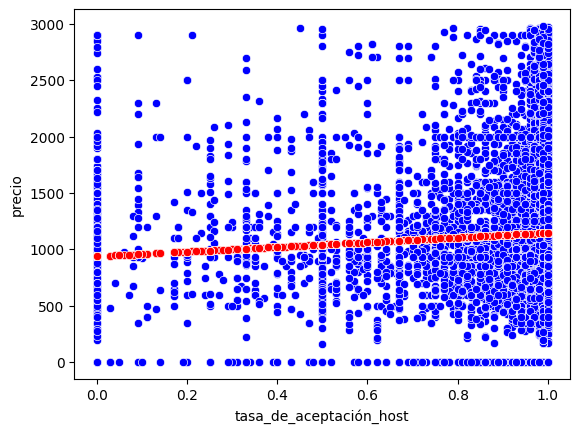

In [61]:
vars_Indep= df_entire_room[['tasa_de_aceptación_host']]
Vars_Dep= df_entire_room['precio']

from sklearn.linear_model import LinearRegression
model= LinearRegression()

model.fit(X=vars_Indep, y=Vars_Dep)

model.__dict__

y_pred= model.predict(X=df_entire_room[['tasa_de_aceptación_host']])
y_pred

df_entire_room.insert(0, 'PM1', y_pred)
df_entire_room

sns.scatterplot(x='tasa_de_aceptación_host', y='precio', color='blue', data=df_entire_room)
sns.scatterplot(x='tasa_de_aceptación_host', y='PM1', color='red', data=df_entire_room)[['tasa_de_aceptación_host']]
Vars_Dep= df_entire_room['precio']

from sklearn.linear_model import LinearRegression
model= LinearRegression()

model.fit(X=vars_Indep, y=Vars_Dep)

model.__dict__

y_pred= model.predict(X=df_entire_room[['tasa_de_aceptación_host']])
y_pred

df_entire_room.insert(0, 'Pr1', y_pred)
df_entire_room

sns.scatterplot(x='tasa_de_aceptación_host', y='precio', color='blue', data=df_entire_room)
sns.scatterplot(x='tasa_de_aceptación_host', y='Pr1', color='red', data=df_entire_room)

__PRECIO vs TIPO HABITACIÓN__

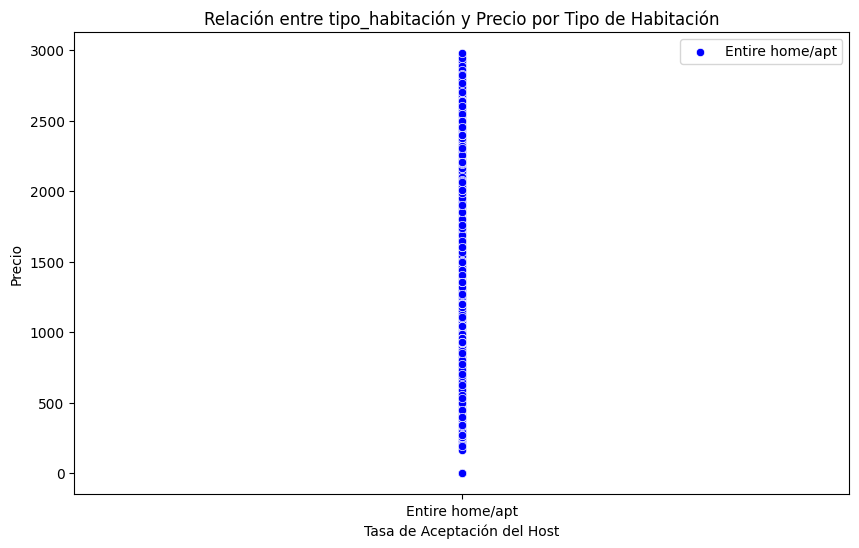

In [ ]:
df_entire_room = dfv[dfv['tipo_habitación'] == 'Entire home/apt'].dropna(subset=['tipo_habitación', 'precio'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tipo_habitación', y='precio', data=df_entire_room, color='blue', label='Entire home/apt')
plt.title("Relación entre tipo_habitación y Precio por Tipo de Habitación")
plt.xlabel("Tasa de Aceptación del Host")
plt.ylabel("Precio")
plt.legend()
plt.show()

In [ ]:
df_entire_room['tipo_habitación'] = df_entire_room['tipo_habitación'].map({'Private room': 3})

In [ ]:
df_entire_room['tipo_habitación'] = df_entire_room['tipo_habitación'].fillna(df_entire_room['tipo_habitación'].mean())

In [ ]:
data12=df_entire_room["tipo_habitación"] = df_entire_room["tipo_habitación"].fillna("0")

<Axes: xlabel='tipo_habitación', ylabel='precio'>

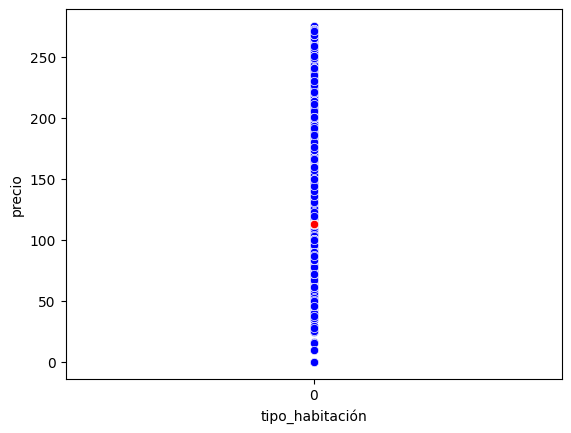

In [ ]:
vars_Indep= df_entire_room[['tipo_habitación']]
Vars_Dep= df_entire_room['precio']

from sklearn.linear_model import LinearRegression
model= LinearRegression()

model.fit(X=vars_Indep, y=Vars_Dep)

model.__dict__

y_pred= model.predict(X=df_entire_room[['tipo_habitación']])
y_pred

df_entire_room.insert(0, 'Pre2', y_pred)
df_entire_room

sns.scatterplot(x='tipo_habitación', y='precio', color='blue', data=df_entire_room)
sns.scatterplot(x='tipo_habitación', y='Pre2', color='red', data=df_entire_room)

__PRICE vs HOST IS SUPERHOST__

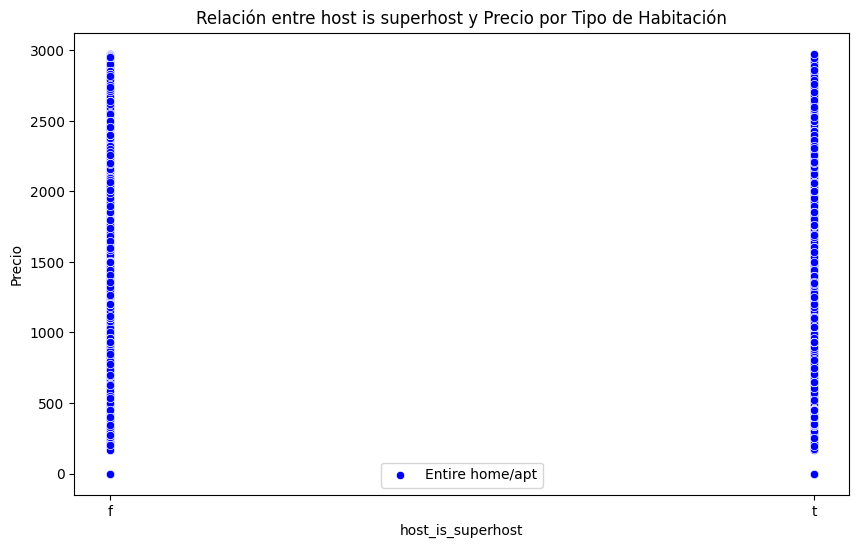

In [ ]:
df_entire_room = dfv[dfv['tipo_habitación'] == 'Entire home/apt'].dropna(subset=['host_is_superhost', 'precio'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='host_is_superhost', y='precio', data=df_entire_room, color='blue', label='Entire home/apt')
plt.title("Relación entre host is superhost y Precio por Tipo de Habitación")
plt.xlabel("host_is_superhost")
plt.ylabel("Precio")
plt.legend()
plt.show()

In [ ]:
df_entire_room['host_is_superhost'] = df_entire_room['host_is_superhost'].map({'f': 0, 't': 1, 'n':0.5})

<Axes: xlabel='host_is_superhost', ylabel='precio'>

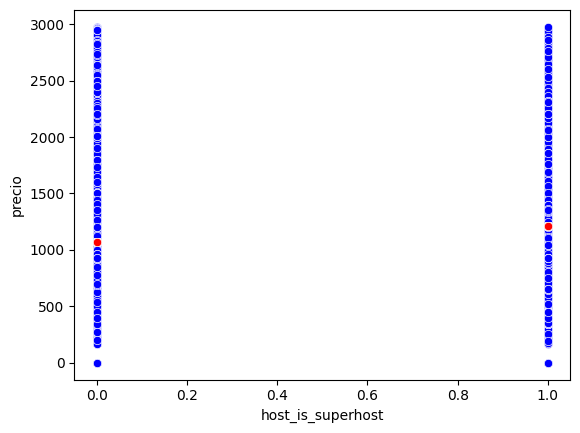

In [ ]:
vars_Indep= df_entire_room[['host_is_superhost']]
Vars_Dep= df_entire_room['precio']

from sklearn.linear_model import LinearRegression
model= LinearRegression()

model.fit(X=vars_Indep, y=Vars_Dep)

model.__dict__

y_pred= model.predict(X=df_entire_room[['host_is_superhost']])
y_pred

df_entire_room.insert(0, 'Pre2', y_pred)
df_entire_room

sns.scatterplot(x='host_is_superhost', y='precio', color='blue', data=df_entire_room)
sns.scatterplot(x='host_is_superhost', y='Pre2', color='red', data=df_entire_room)

__accommodates vs bathrooms__

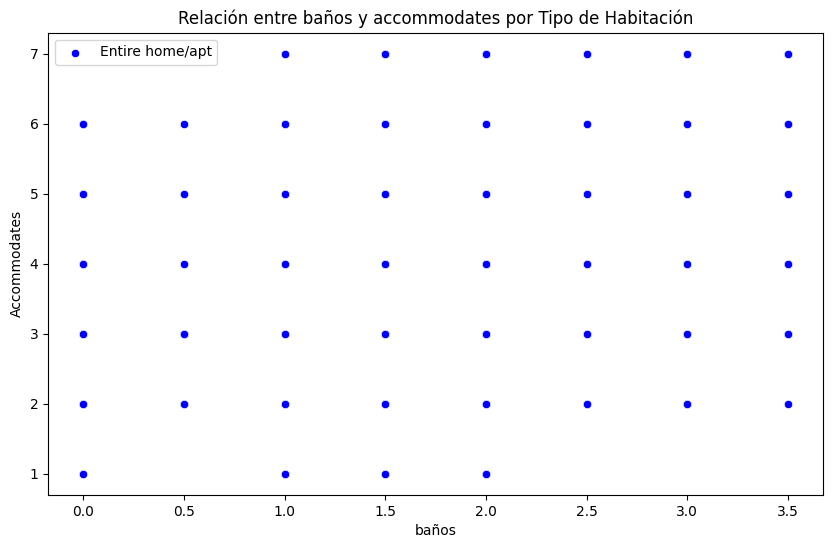

In [ ]:
df_entire_room = dfv[dfv['tipo_habitación'] == 'Entire home/apt'].dropna(subset=['baños', 'se_adapta'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='baños', y='se_adapta', data=df_entire_room, color='blue', label='Entire home/apt')
plt.title("Relación entre baños y accommodates por Tipo de Habitación")
plt.xlabel("baños")
plt.ylabel("Accommodates")
plt.legend()
plt.show()

<Axes: xlabel='baños', ylabel='se_adapta'>

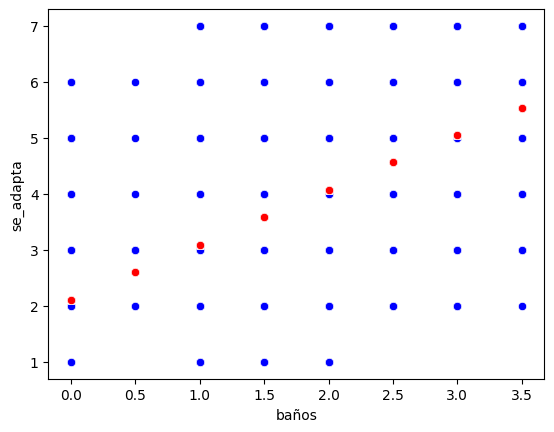

In [ ]:
vars_Indep= df_entire_room[['baños']]
Vars_Dep= df_entire_room['se_adapta']

from sklearn.linear_model import LinearRegression
model= LinearRegression()

model.fit(X=vars_Indep, y=Vars_Dep)

model.__dict__

y_pred= model.predict(X=df_entire_room[['baños']])
y_pred

df_entire_room.insert(0, 'Pre3', y_pred)
df_entire_room

sns.scatterplot(x='baños', y='se_adapta', color='blue', data=df_entire_room)
sns.scatterplot(x='baños', y='Pre3', color='red', data=df_entire_room)

__price vs review_scores_cleanliness__

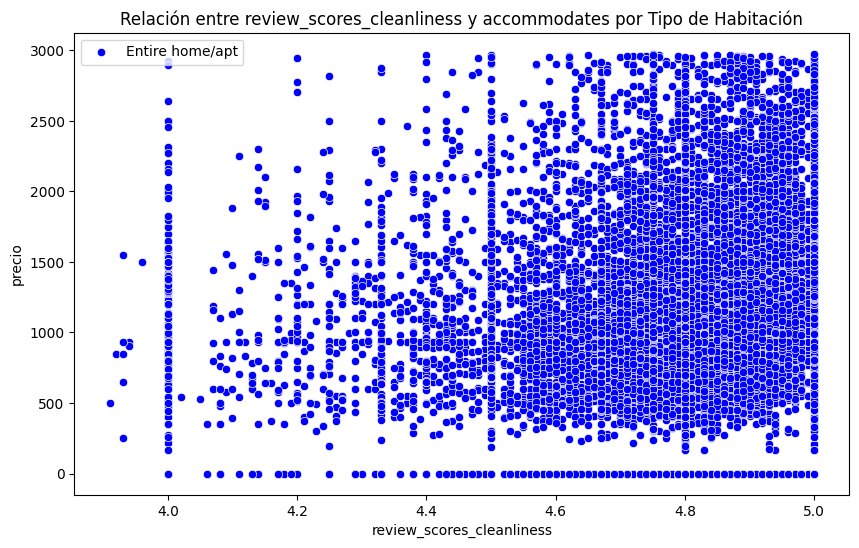

In [ ]:
df_entire_room = dfv[dfv['tipo_habitación'] == 'Entire home/apt'].dropna(subset=['review_scores_cleanliness', 'precio'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_scores_cleanliness', y='precio', data=df_entire_room, color='blue', label='Entire home/apt')
plt.title("Relación entre review_scores_cleanliness y accommodates por Tipo de Habitación")
plt.xlabel("review_scores_cleanliness")
plt.ylabel("precio")
plt.legend()
plt.show()

<Axes: xlabel='review_scores_cleanliness', ylabel='precio'>

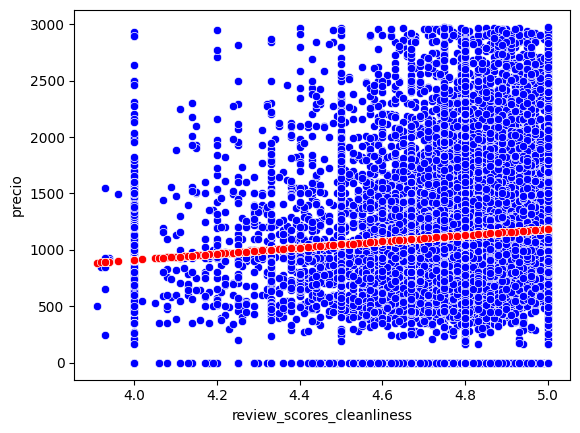

In [ ]:
vars_Indep= df_entire_room[['review_scores_cleanliness']]
Vars_Dep= df_entire_room['precio']

from sklearn.linear_model import LinearRegression
model= LinearRegression()

model.fit(X=vars_Indep, y=Vars_Dep)

model.__dict__

y_pred= model.predict(X=df_entire_room[['review_scores_cleanliness']])
y_pred

df_entire_room.insert(0, 'Predicc', y_pred)
df_entire_room

sns.scatterplot(x='review_scores_cleanliness', y='precio', color='blue', data=df_entire_room)
sns.scatterplot(x='review_scores_cleanliness', y='Predicc', color='red', data=df_entire_room)

__price vs número_de_reseñas__

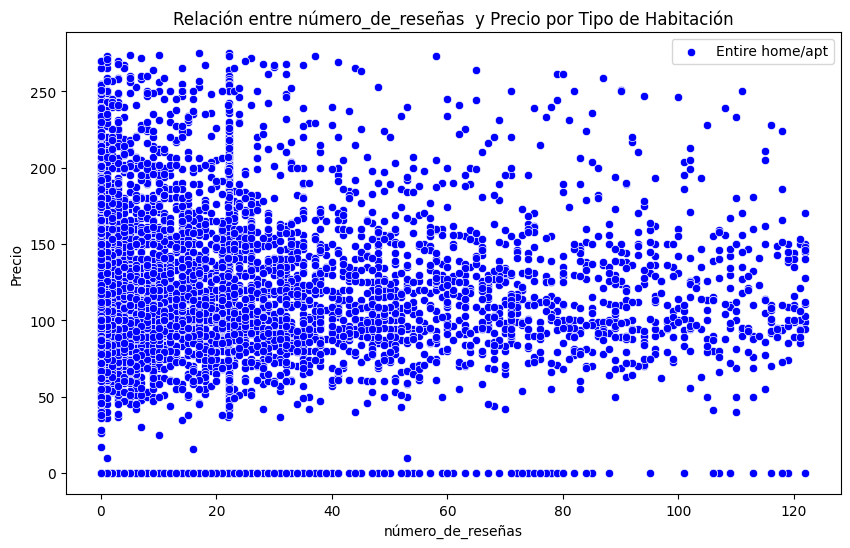

In [ ]:
df_entire_room = dfv[dfv['tipo_habitación'] == 'Entire home/apt'].dropna(subset=['número_de_reseñas', 'precio'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='número_de_reseñas', y='precio', data=df_entire_room, color='blue', label='Entire home/apt')
plt.title("Relación entre número_de_reseñas  y Precio por Tipo de Habitación")
plt.xlabel("número_de_reseñas")
plt.ylabel("Precio")
plt.legend()
plt.show()

<Axes: xlabel='número_de_reseñas', ylabel='precio'>

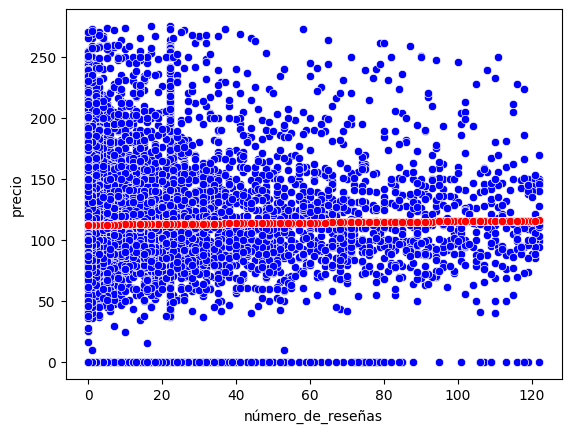

In [ ]:
vars_Indep= df_entire_room[['número_de_reseñas']]
Vars_Dep= df_entire_room['precio']

from sklearn.linear_model import LinearRegression
model= LinearRegression()

model.fit(X=vars_Indep, y=Vars_Dep)

model.__dict__

y_pred= model.predict(X=df_entire_room[['número_de_reseñas']])
y_pred

df_entire_room.insert(0, 'Predic', y_pred)
df_entire_room

sns.scatterplot(x='número_de_reseñas', y='precio', color='blue', data=df_entire_room)
sns.scatterplot(x='número_de_reseñas', y='Predic', color='red', data=df_entire_room)

__price vs instant_bookable__

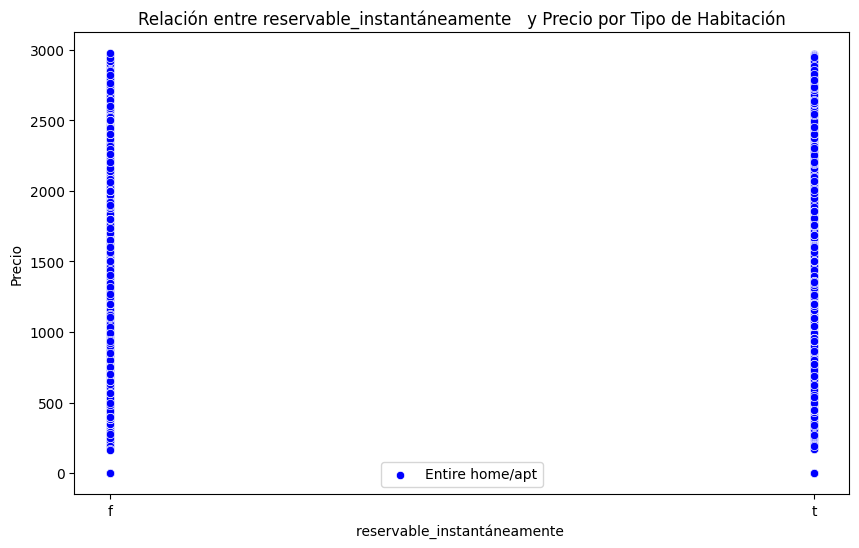

In [ ]:
df_entire_room = dfv[dfv['tipo_habitación'] == 'Entire home/apt'].dropna(subset=['reservable_instantáneamente', 'precio'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='reservable_instantáneamente', y='precio', data=df_entire_room, color='blue', label='Entire home/apt')
plt.title("Relación entre reservable_instantáneamente   y Precio por Tipo de Habitación")
plt.xlabel("reservable_instantáneamente ")
plt.ylabel("Precio")
plt.legend()
plt.show()

In [ ]:
df_entire_room['reservable_instantáneamente'] = df_entire_room['reservable_instantáneamente'].map({'f': 0, 't': 1})

<Axes: xlabel='reservable_instantáneamente', ylabel='precio'>

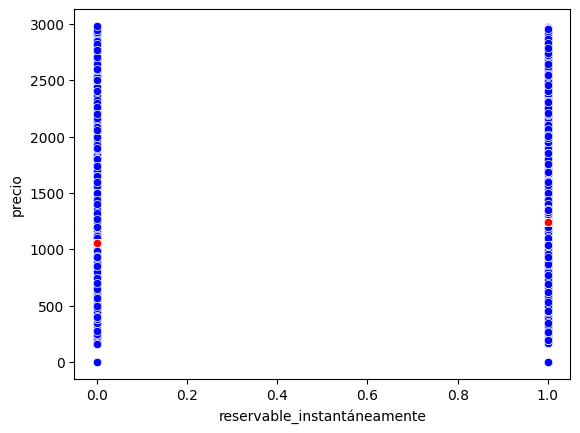

In [ ]:
vars_Indep= df_entire_room[['reservable_instantáneamente']]
Vars_Dep= df_entire_room['precio']

from sklearn.linear_model import LinearRegression
model= LinearRegression()

model.fit(X=vars_Indep, y=Vars_Dep)

model.__dict__

y_pred= model.predict(X=df_entire_room[['reservable_instantáneamente']])
y_pred

df_entire_room.insert(0, 'Predi', y_pred)
df_entire_room

sns.scatterplot(x='reservable_instantáneamente', y='precio', color='blue', data=df_entire_room)
sns.scatterplot(x='reservable_instantáneamente', y='Predi', color='red', data=df_entire_room)

__Price vs property_type__

In [ ]:
frecuencias = dfv['tipo_propiedad'].value_counts()
dfv['tipo_propiedad'] = dfv['tipo_propiedad'].map(frecuencias)
print(dfv[['tipo_propiedad']])

       tipo_propiedad
0                  13
1                 817
2                9971
3                9971
4                1515
...               ...
26577             381
26578             504
26579             504
26580             504
26581            9971

[26582 rows x 1 columns]


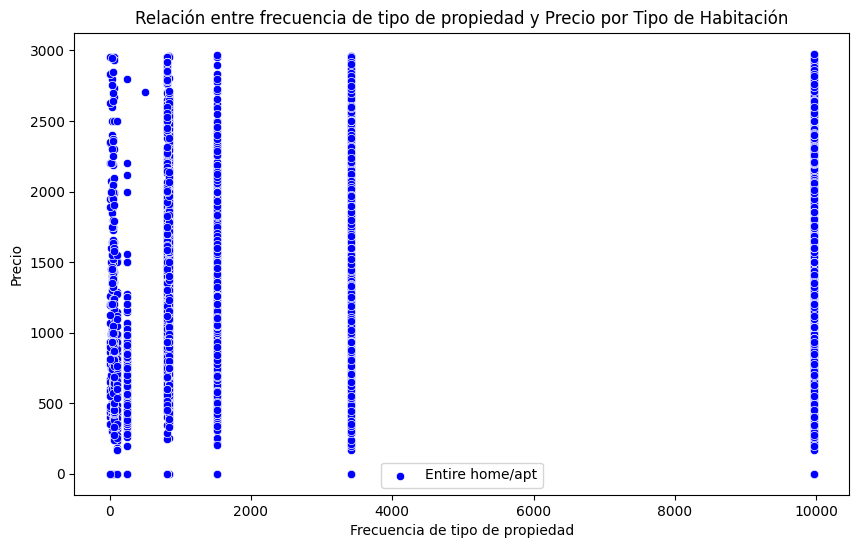

In [ ]:
f_e_room = dfv[dfv['tipo_habitación'] == 'Entire home/apt'].dropna(subset=['tipo_propiedad', 'precio'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tipo_propiedad', y='precio', data=f_e_room, color='blue', label='Entire home/apt')
plt.title("Relación entre frecuencia de tipo de propiedad y Precio por Tipo de Habitación")
plt.xlabel("Frecuencia de tipo de propiedad")
plt.ylabel("Precio")
plt.legend()
plt.show()

<Axes: xlabel='tipo_propiedad', ylabel='precio'>

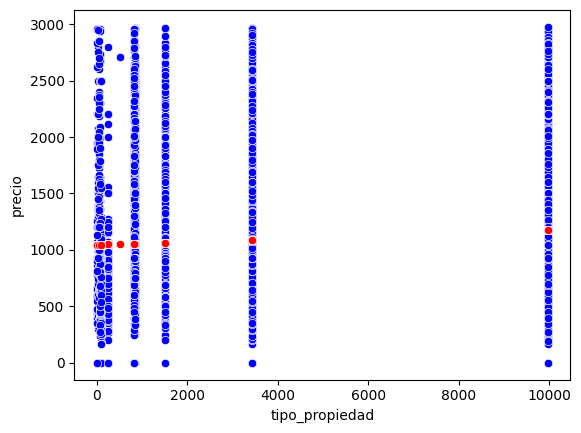

In [ ]:
vars_Indep= f_e_room[['tipo_propiedad']]
Vars_Dep= f_e_room['precio']

from sklearn.linear_model import LinearRegression
model= LinearRegression()

model.fit(X=vars_Indep, y=Vars_Dep)

model.__dict__

y_pred= model.predict(X=f_e_room[['tipo_propiedad']])
y_pred

f_e_room.insert(0, 'Pre', y_pred)
f_e_room

sns.scatterplot(x='tipo_propiedad', y='precio', color='blue', data=f_e_room)
sns.scatterplot(x='tipo_propiedad', y='Pre', color='red', data=f_e_room)

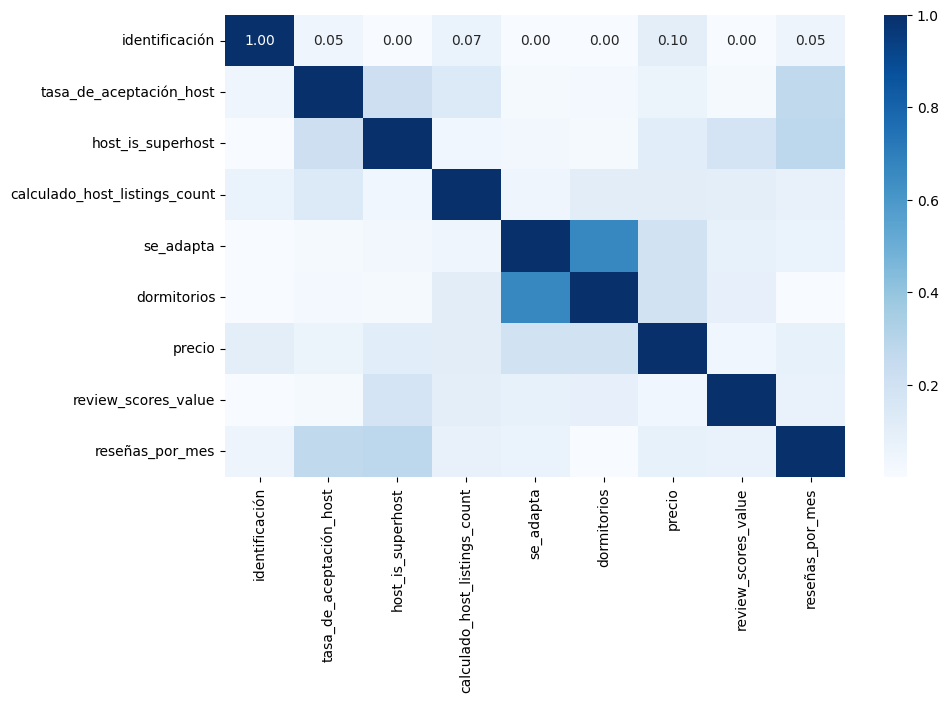

In [62]:
filtro = df_entire_room.loc[:, ["identificación", "tasa_de_aceptación_host", "host_is_superhost", "calculado_host_listings_count", "se_adapta", "dormitorios", "precio", "review_scores_value", "reseñas_por_mes"]]

filtro["host_is_superhost"] = filtro["host_is_superhost"].map({'t': 1, 'f': 0})  
filtro["se_adapta"] = filtro["se_adapta"].astype("category").cat.codes  

filtro = filtro.apply(pd.to_numeric, errors='coerce')

Corr_Factors = filtro.corr()

Corr_Factors1 = abs(Corr_Factors)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(Corr_Factors1, cmap='Blues', annot=True, fmt=".2f")
plt.show()